In [178]:
import pandas as pd
import numpy as np

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [180]:
df=pd.read_excel('customer_retention_dataset.xlsx')
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
5                  Female         31-40 years   
6                    Male         41-50 yaers   
7                    Male         41-50 yaers   
8                  Female  Less than 20 years   
9                  Female         31-40 years   
10                   Male         31-40 years   
11                 Female         41-50 yaers   
12                 Female  51 years and above   
13                 Female         31-40 years   
14                 Female         21-30 years   
15                 Female         21-30 years   
16                   Male         31-40 years   
17                   Male         41-50 yaers   
18                 Female         41-50 yaers   
19                 Female         21-30 years   
20                 Female         21-30 years   
21                   Male         31-40 years   
22                   Male         41-50 yaers   
23                 Female         41-50 yaers   
24                 Female         21-30 years   
25                 Female         21-30 years   
26                   Male         21-30 years   
27                   Male         31-40 years   
28                 Female         41-50 yaers   
29                 Female         41-50 yaers   
30                 Female  Less than 20 years   
31                   Male         31-40 years   
32                   Male         31-40 years   
33                 Female         41-50 yaers   
34                 Female  51 years and above   
35                 Female         21-30 years   
36                   Male         31-40 years   
37                   Male         41-50 yaers   
38                 Female         41-50 yaers   
39                 Female         21-30 years   
40                 Female         21-30 years   
41                   Male         31-40 years   
42                   Male         21-30 years   
43                 Female         21-30 years   
44                 Female         31-40 years   
45                 Female         41-50 yaers   
46                   Male         41-50 yaers   
47                   Male  Less than 20 years   
48                 Female         31-40 years   
49                 Female         31-40 years   
50                 Female         41-50 yaers   
51                   Male  51 years and above   
52                   Male         41-50 yaers   
53                 Female         41-50 yaers   
54                 Female         21-30 years   
55                 Female         21-30 years   
56                   Male         21-30 years   
57                   Male         21-30 years   
58                 Female         31-40 years   
59                 Female         41-50 yaers   
60                 Female         41-50 yaers   
61                   Male  Less than 20 years   
62                   Male         31-40 years   
63                 Female         31-40 years   
64                 Female         41-50 yaers   
65                 Female  51 years and above   
66                   Male         31-40 years   
67                   Male         41-50 yaers   
68                 Female         41-50 yaers   
69                 Female         21-30 years   
70                 Female         21-30 years   
71                   Male         31-40 years   
72                   Male         21-30 years   
73                 Female         21-30 years   
74                 Female         31-40 years   
75                 Female         41-50 yaers   
76                   Male         41-50 yaers   
77                   Male  Less than 20 years   
78                 Female         31-40 years   
79                 Female         31-40 years   
80                 Female         4

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [182]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]
len(missing_features)

0

No missing Data is Present in Dataset.

In [183]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('Length of Categorical_Features',len(categorical_features))

Length of Categorical_Features 70


In [184]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [185]:
tabel=[]

for i in df.columns:
    tabel.append([i,df[i].nunique(),df[i].drop_duplicates().values])
pd.DataFrame(tabel,columns=['features','Unique No','Uniques Values'])

features  Unique No  \
0                               1Gender of respondent          2   
1                                 2 How old are you?           5   
2               3 Which city do you shop online from?         11   
3   4 What is the Pin Code of where you shop onlin...         39   
4          5 Since How Long You are Shopping Online ?          5   
5   6 How many times you have made an online purch...          6   
6   7 How do you access the internet while shoppin...          4   
7   8 Which device do you use to access the online...          4   
8   9 What is the screen size of your mobile devic...          4   
9   10 What is the operating system (OS) of your d...          3   
10  11 What browser do you run on your device to a...          4   
11  12 Which channel did you follow to arrive at y...          3   
12  13 After first visit, how do you reach the onl...          5   
13  14 How much time do you explore the e- retail ...          5   
14  15 What is your preferred payment Option?\t\t\...          3   
15  16 How frequently do you abandon (selecting an...          4   
16  17 Why did you abandon the “Bag”, “Shopping Ca...          5   
17  18 The content on the website must be easy to ...          4   
18  19 Information on similar product to the one h...          4   
19  20 Complete information on listed seller and p...          5   
20  21 All relevant information on listed products...          4   
21                   22 Ease of navigation in website          4   
22                    23 Loading and processing speed          5   
23          24 User friendly Interface of the website          5   
24                      25 Convenient Payment methods          3   
25  26 Trust that the online retail store will ful...          4   
26  27 Empathy (readiness to assist with queries) ...          4   
27  28 Being able to guarantee the privacy of the ...          3   
28  29 Responsiveness, availability of several com...          4   
29  30 Online shopping gives monetary benefit and ...          5   
30       31 Enjoyment is derived from shopping online          5   
31      32 Shopping online is convenient and flexible          4   
32  33 Return and replacement policy of the e-tail...          3   
33  34 Gaining access to loyalty programs is a ben...          5   
34  35 Displaying quality Information on the websi...          3   
35  36 User derive satisfaction while shopping on ...          3   
36  37 Net Benefit derived from shopping online ca...          4   
37    38 User satisfaction cannot exist without trust          5   
38  39 Offering a wide variety of listed product i...          4   
39  40 Provision of complete and relevant product ...          4   
40                                41 Monetary savings          4   
41  42 The Convenience of patronizing the online r...          3   
42  43 Shopping on the website gives you the sense...          5   
43  44 Shopping on your preferred e-tailer enhance...          5   
44  45 You feel gratification shopping on your fav...          5   
45  46 Shopping on the website helps you fulfill c...          5   
46                   47 Getting value for money spent          3   
47  From the following, tick any (or all) of the o...          9   
48                 Easy to use website or application         10   
49                   Visual appealing web-page layout         10   
50                   Wild variety of product on offer          9   
51  Complete, relevant description information of ...         11   
52  Fast loading website speed of website and appl...         10   
53          Reliability of the website or application         10   
54                     Quickness to complete purchase          9   
55            Availability of several payment options         11   
56                             Speedy order delivery           6   
57                  Privacy of customers’ information         11   
58         Security of customer f

In [243]:
df['What is the screen size of your mobile device?']=df['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ']
df['What is the operating system (OS) of your device?']=df['10 What is the operating system (OS) of your device?\t\t\t\t                                          ']
df['What browser do you run on your device to access the website?']=df['11 What browser do you run on your device to access the website?\t\t\t                                                          ']
df['Which channel did you follow to arrive at your favorite online store for the first time?']=df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ']
df['After first visit, how do you reach the online retail store?\t\t\t\t']=df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ']
df['How much time do you explore the e- retail store before making a purchase decision?']=df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ']
df['What is your preferred payment Option?']=df['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ']
df['How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?']=df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ']
df['Why did you abandon the “Bag”, “Shopping Cart”?']=df['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ']

# Visualisation

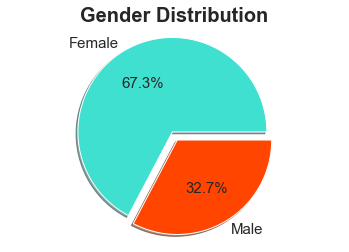

In [198]:
x=df['1Gender of respondent'].value_counts()
explode=(0,0.1)
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%',explode=explode,colors=['turquoise', 'orangered'],textprops={'fontsize':15})
plt.title("Gender Distribution",fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

From this Graph we can see that females are shopping more online than man.

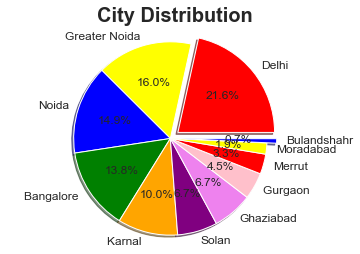

In [199]:
x=df['3 Which city do you shop online from?'].value_counts()
explode=(0.1,0,0,0,0,0,0,0,0,0,0.1)
ax=plt.subplot()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%',explode=explode,colors=['red','yellow','blue','green','orange','purple','violet','pink'],textprops={'fontsize':12})
plt.title("City Distribution",fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

Delhi and Nodia shopping more Online  than other cities

Text(0, 0.5, 'Count')

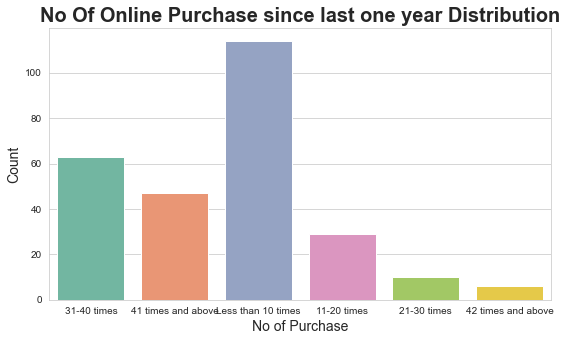

In [200]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(df['6 How many times you have made an online purchase in the past 1 year?'],palette='Set2')
plt.title('No Of Online Purchase since last one year Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('No of Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)

Very Few people are there who purchasing more than 42 times in past year. and most people purchasing less than 10 times in a year.

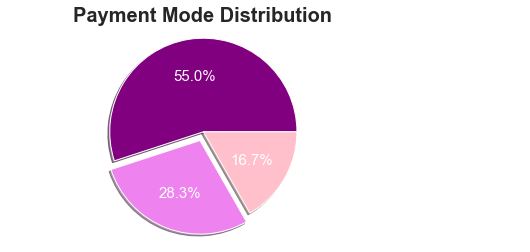

In [201]:
x=df['What is your preferred payment Option?'].value_counts()
explode=(0,0.1,0)
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%',explode=explode,colors=['purple','violet','pink'],textprops={'fontsize':15,'color':'white'})
plt.title("Payment Mode Distribution",fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

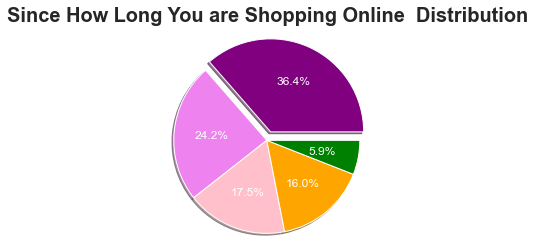

In [202]:
x=df['5 Since How Long You are Shopping Online ?'].value_counts()
explode=(0.1,0,0,0,0)
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%',explode=explode,colors=['purple','violet','pink','orange','green'],textprops={'fontsize':12,'color':'white'})
plt.title("Since How Long You are Shopping Online  Distribution",fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

# Review 

Gratification Shopping

Text(0, 0.5, 'Count')

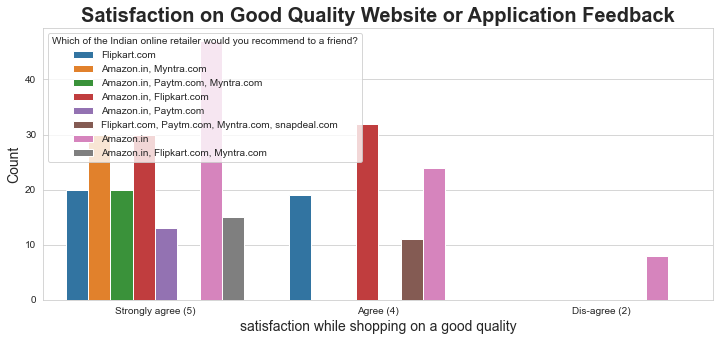

In [203]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.countplot(df['36 User derive satisfaction while shopping on a good quality website or application'],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
plt.title('Satisfaction on Good Quality Website or Application Feedback',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('satisfaction while shopping on a good quality',fontsize=14)
plt.ylabel('Count',fontsize=14)

Gratification on Amazone are strongly agree. thats good sign but similar only one Amazone some people are also Dis agree.

In [204]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.countplot(df['45 You feel gratification shopping on your favorite e-tailer'],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
plt.title('gratification shopping on your favorite e-tailer Feedback',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('gratification shopping on your favorite e-tailer',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

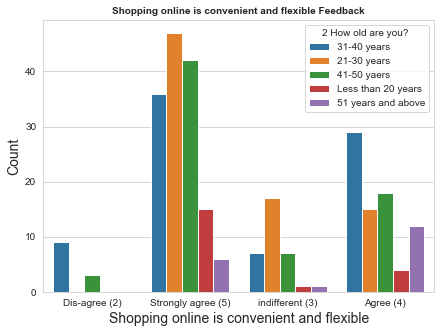

In [205]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,5))
sns.countplot(df['32 Shopping online is convenient and flexible'],hue=df['2 How old are you? '])
plt.title('Shopping online is convenient and flexible Feedback',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Shopping online is convenient and flexible',fontsize=14)
plt.ylabel('Count',fontsize=14)

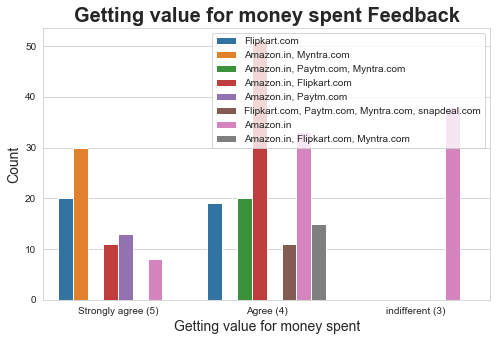

In [206]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['47 Getting value for money spent'],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
plt.title('Getting value for money spent Feedback',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Getting value for money spent',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.legend(loc='upper right')

Value for money spend most people are agree for Flipcart and Amazone and as same most people are also in different for Amazone too.

Text(0, 0.5, 'Count')

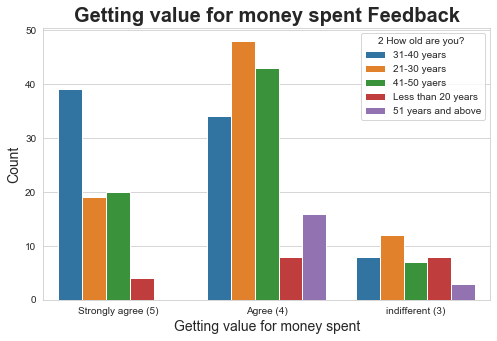

In [207]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['47 Getting value for money spent'],hue=df['2 How old are you? '])
plt.title('Getting value for money spent Feedback',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Getting value for money spent',fontsize=14)
plt.ylabel('Count',fontsize=14)

people between the age 31-40 strongly agree that from online Retailer shopping the values for money.no one is Dis agree for thta 
so trend for onlishopping is positive. and very few people are confusion on that and they are netural for that.

<AxesSubplot:title={'center':'Display Quality Information Feedback'}, xlabel='Getting value for money spent', ylabel='Count'>

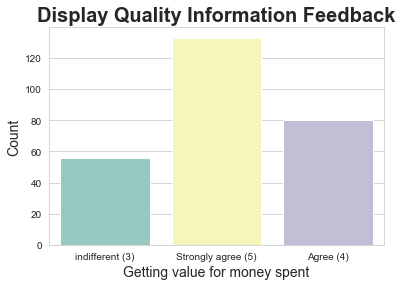

In [208]:
sns.set_style('whitegrid')
sns.countplot(df['35 Displaying quality Information on the website improves satisfaction of customers'],palette='Set3')
plt.title('Display Quality Information Feedback',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Getting value for money spent',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.subplot(1,1,1)


Best Deal

Text(0, 0.5, 'Count')

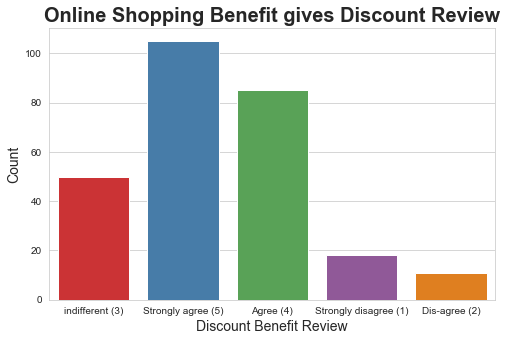

In [209]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['30 Online shopping gives monetary benefit and discounts'],palette='Set1')
plt.title('Online Shopping Benefit gives Discount Review',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Discount Benefit Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

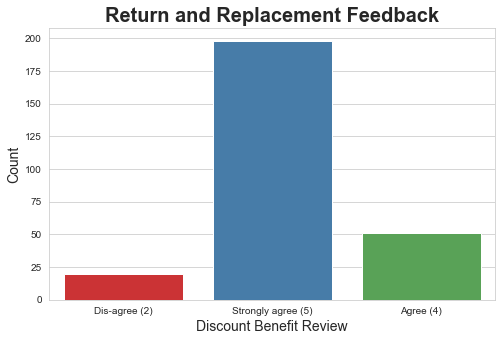

In [210]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['33 Return and replacement policy of the e-tailer is important for purchase decision'],palette='Set1')
plt.title('Return and Replacement Feedback',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Discount Benefit Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

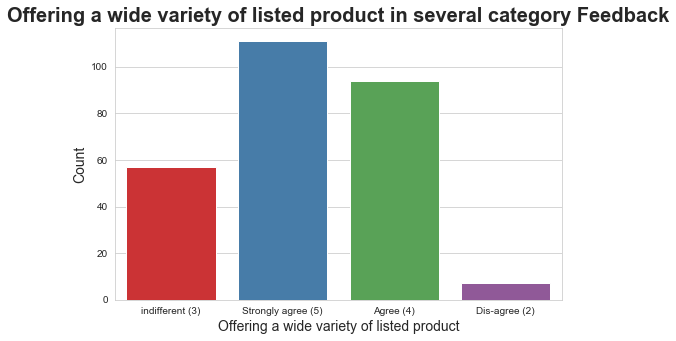

In [211]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['39 Offering a wide variety of listed product in several category'],palette='Set1')
plt.title('Offering a wide variety of listed product in several category Feedback',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Offering a wide variety of listed product',fontsize=14)
plt.ylabel('Count',fontsize=14)

Social

Text(0, 0.5, 'Count')

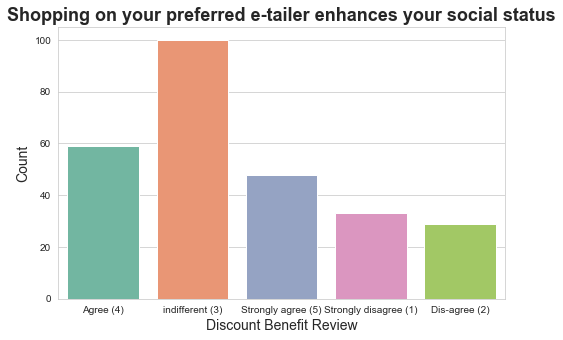

In [212]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['44 Shopping on your preferred e-tailer enhances your social status'],palette='Set2')
plt.title('Shopping on your preferred e-tailer enhances your social status',fontdict={'fontweight':'bold','fontsize':18})
plt.xlabel('Discount Benefit Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Adventure

Text(0, 0.5, 'Count')

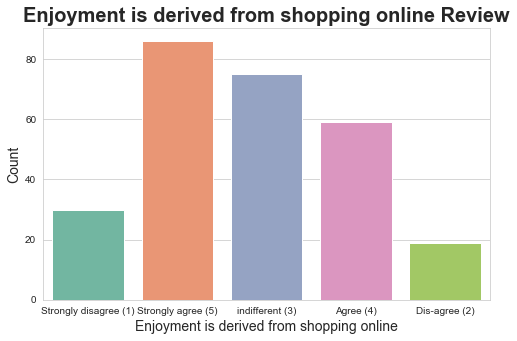

In [213]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['31 Enjoyment is derived from shopping online'],palette='Set2')
plt.title('Enjoyment is derived from shopping online Review',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Enjoyment is derived from shopping online',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

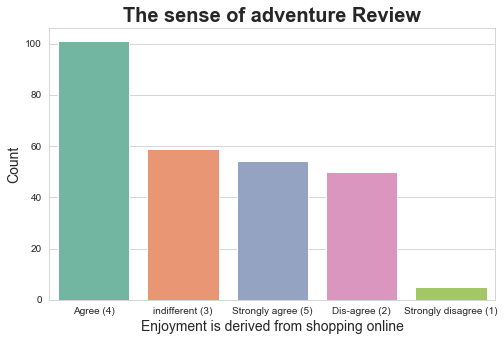

In [214]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['43 Shopping on the website gives you the sense of adventure'],palette='Set2')
plt.title('The sense of adventure Review',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Enjoyment is derived from shopping online',fontsize=14)
plt.ylabel('Count',fontsize=14)

# Utilitrain Value

Product Offering

In [215]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['30 Online shopping gives monetary benefit and discounts'],palette='Set3')
plt.title('Online Shopping Benefit gives Discount Review',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Discount Benefit Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

Convenience

Text(0, 0.5, 'Count')

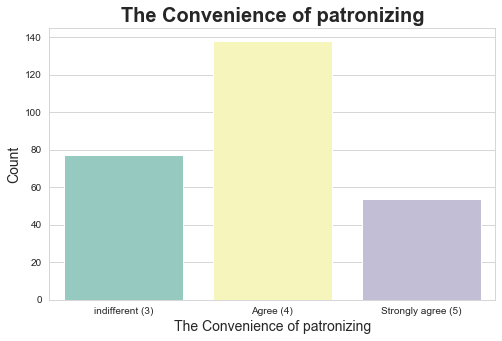

In [216]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['42 The Convenience of patronizing the online retailer'],palette='Set3')
plt.title('The Convenience of patronizing',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('The Convenience of patronizing',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [217]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['25 Convenient Payment methods'],palette='Set3')
plt.title('Payment Methods Review',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Discount Benefit Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

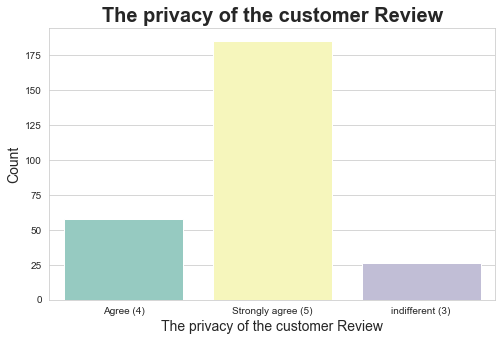

In [218]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['28 Being able to guarantee the privacy of the customer'],palette='Set3')
plt.title('The privacy of the customer Review',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('The privacy of the customer Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

In [219]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['24 User friendly Interface of the website'],palette='Set3')
plt.title('User friendly Interface of the website',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('User friendly Interface of the website Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

Product Information

In [220]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['19 Information on similar product to the one highlighted  is important for product comparison'],palette='Set2')
plt.title('Product Comparion Review',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Product Comparion  Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

In [221]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['20 Complete information on listed seller and product being offered is important for purchase decision.'],palette='Set2')
plt.title('Prchase decision',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Prchase decision Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

In [222]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['21 All relevant information on listed products must be stated clearly'],palette='Set2')
plt.title('All relevant information on listed products must be stated clearly',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('All relevant information Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

In [223]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['40 Provision of complete and relevant product information'],palette='Set2')
plt.title('Provision of complete and relevant product information',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Provision of complete and relevant product information',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

Monetary Saving

Text(0, 0.5, 'Count')

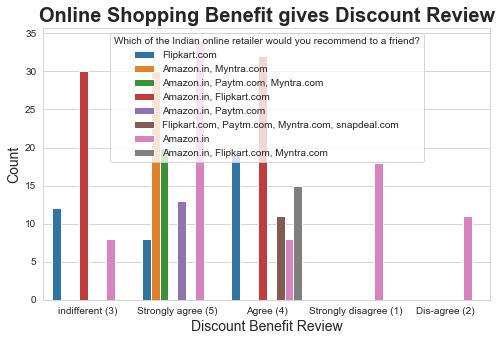

In [224]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['30 Online shopping gives monetary benefit and discounts'],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
plt.title('Online Shopping Benefit gives Discount Review',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Discount Benefit Review',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

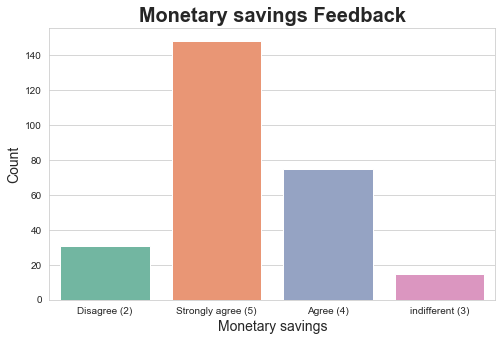

In [225]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['41 Monetary savings'],palette='Set2')
plt.title('Monetary savings Feedback',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Monetary savings',fontsize=14)
plt.ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

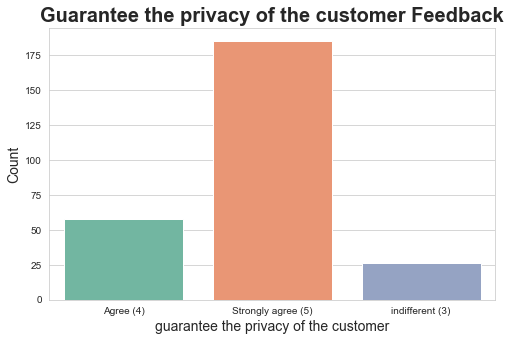

In [226]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(df['28 Being able to guarantee the privacy of the customer'],palette='Set2')
plt.title('Guarantee the privacy of the customer Feedback',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('guarantee the privacy of the customer',fontsize=14)
plt.ylabel('Count',fontsize=14)

Mostly people are strongly agree that retailers should provide the Privacy of the customer information

Text(0, 0.5, 'Count')

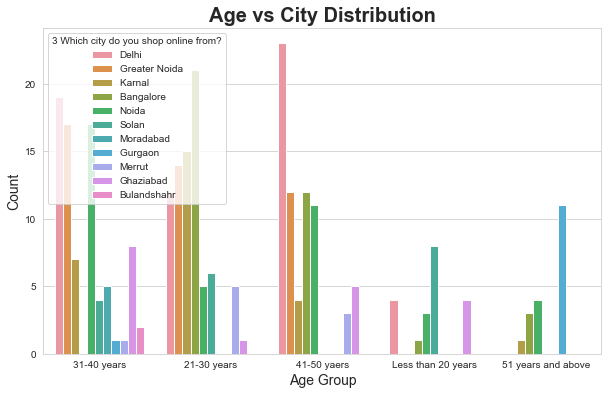

In [228]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x=df['2 How old are you? '],hue=df['3 Which city do you shop online from?'])
plt.title('Age vs City Distribution',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Age Group',fontsize=14)
plt.ylabel('Count',fontsize=14)

# In Delhi age between 31 to 50 do shopping online. in Gurgaon age above 51 do max online shopping.In Delhi whose age above 51 dint 
purchase online anything.age bewlow 20 years purchase more online in Moradabad.

Text(0, 0.5, 'Count')

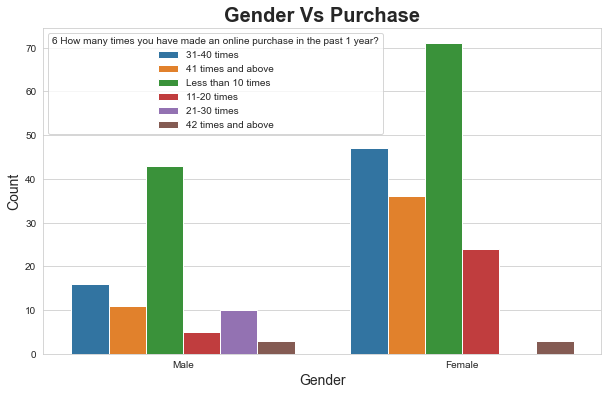

In [229]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(hue=df['6 How many times you have made an online purchase in the past 1 year?'],x=df['1Gender of respondent'])
plt.title('Gender Vs Purchase',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Count',fontsize=14)

Female Purchasing more online than Male through out all age group.

Text(0, 0.5, 'Count')

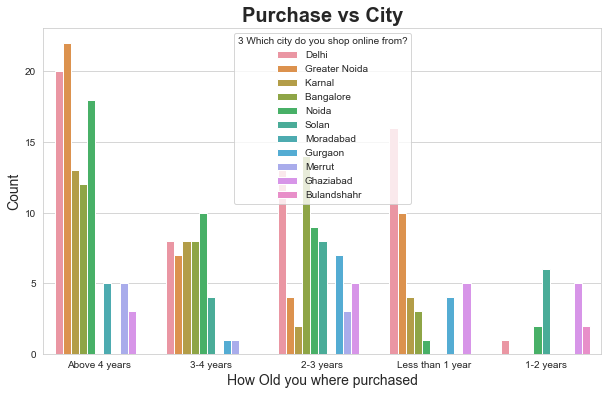

In [230]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(df['5 Since How Long You are Shopping Online ?'],hue=df['3 Which city do you shop online from?'])
plt.title('Purchase vs City',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('How Old you where purchased',fontsize=14)
plt.ylabel('Count',fontsize=14)

From this chart we can see that People purchase online in last 1-2 years is decline. as compair to before 4 years.

Text(0, 0.5, 'Count')

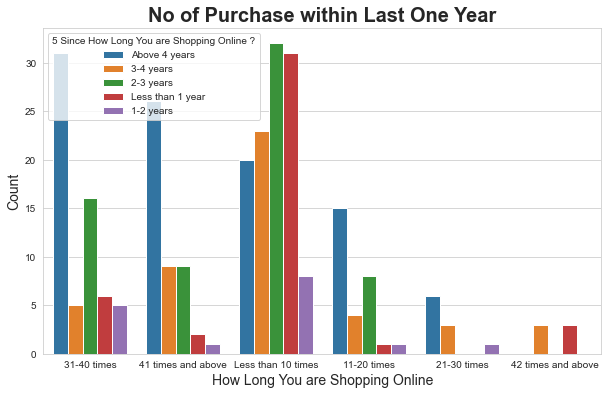

In [231]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(hue=df['5 Since How Long You are Shopping Online ?'],x=df['6 How many times you have made an online purchase in the past 1 year?'])
plt.title('No of Purchase within Last One Year',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('How Long You are Shopping Online',fontsize=14)
plt.ylabel('Count',fontsize=14)

<AxesSubplot:xlabel='count', ylabel='Easy to use website or application'>

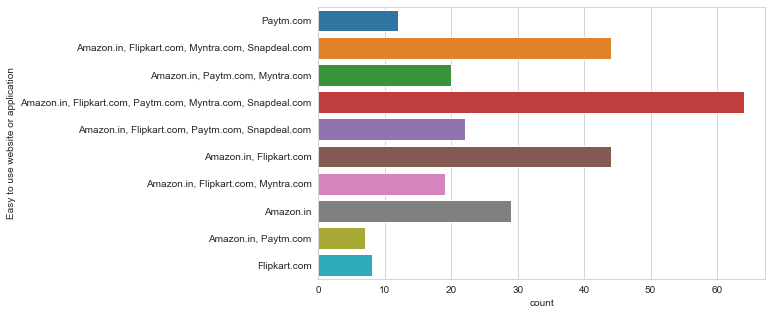

In [234]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['Easy to use website or application'])

# On single count Amazone webiste it better to use easy and less for snapdeal and myntra.

Text(0, 0.5, 'Count')

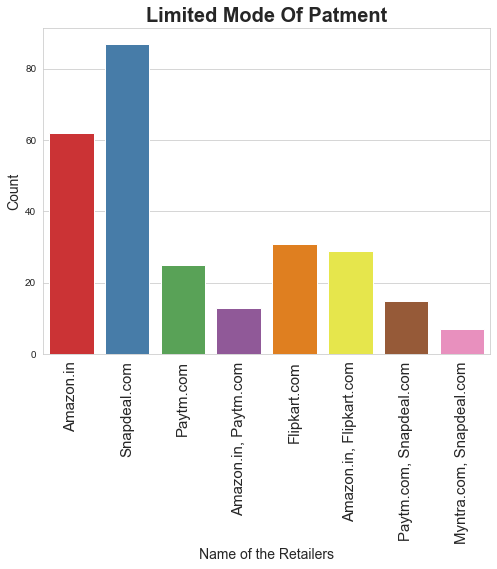

In [241]:
plt.figure(figsize=(8,6))
sns.countplot(df['Limited mode of payment on most products (promotion, sales period)'],palette='Set1')
plt.xticks(rotation=90,fontsize=15)
plt.title('Limited Mode Of Patment',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Name of the Retailers',fontsize=14)
plt.ylabel('Count',fontsize=14)

From grph i can say that Snapdeal has limited mode of payment methods.and pattm has least counts.

Text(0, 0.5, 'Count')

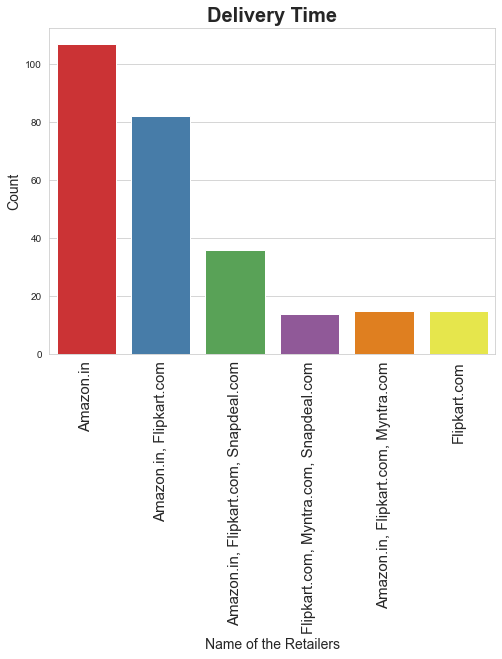

In [242]:
plt.figure(figsize=(8,6))
sns.countplot(df['Speedy order delivery '],palette='Set1')
plt.xticks(rotation=90,fontsize=15)
plt.title('Delivery Time',fontdict={'fontweight':'bold','fontsize':20})
plt.xlabel('Name of the Retailers',fontsize=14)
plt.ylabel('Count',fontsize=14)

# From this chart we can say that Deliver Time For the Amazone is very less means it Deliverd too fast.

In [235]:
#split the Data And we will find Positive and Negative Information w.r.t to Retailers.
data=df.columns[48:71]

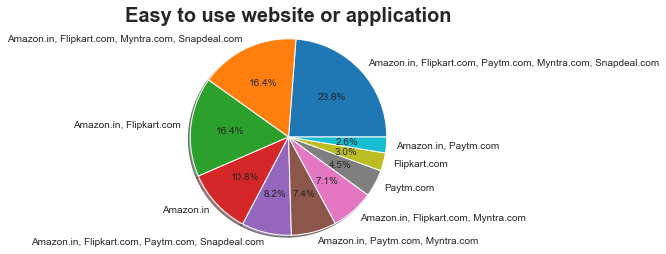

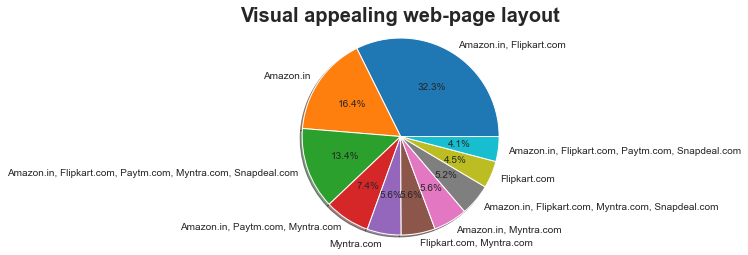

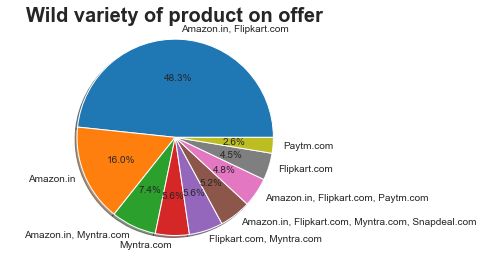

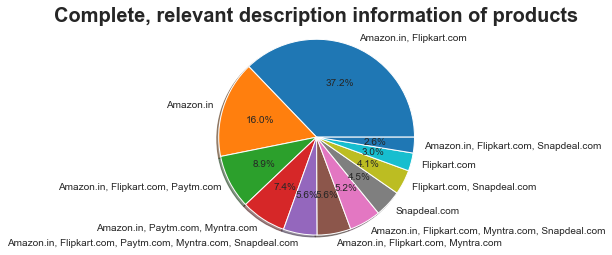

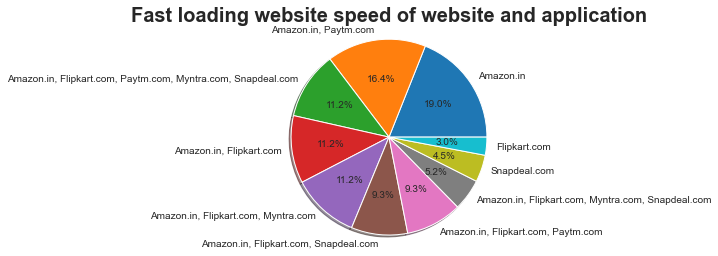

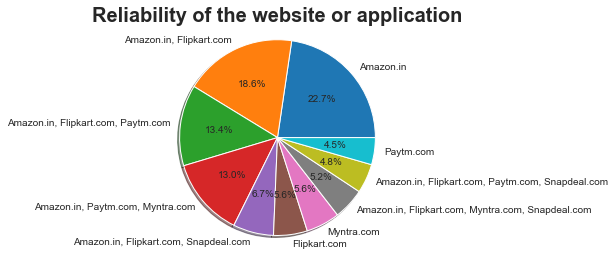

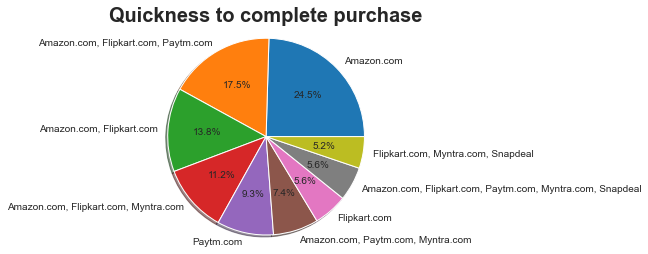

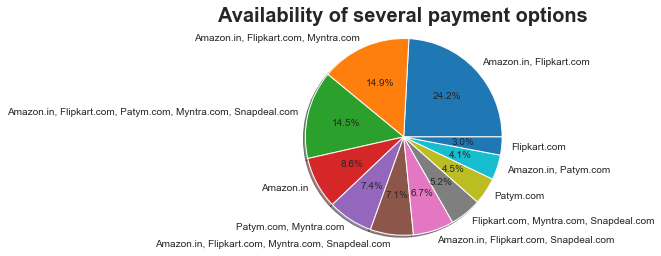

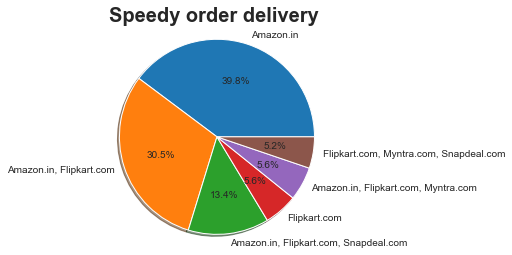

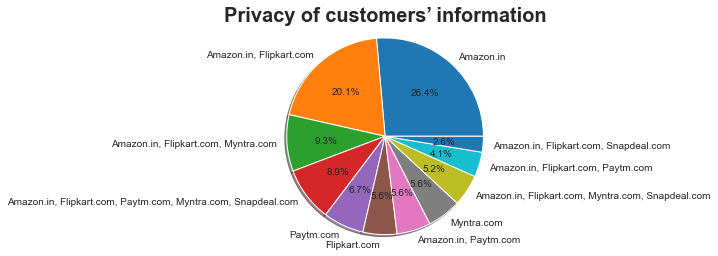

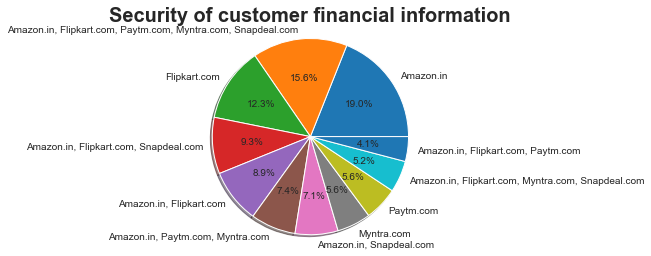

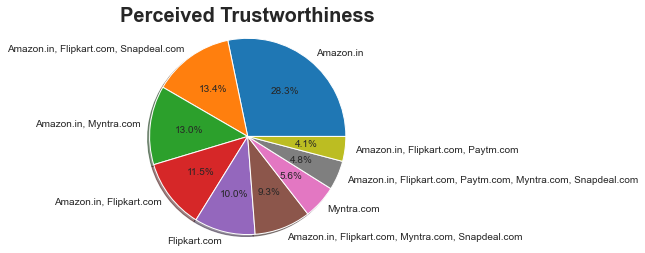

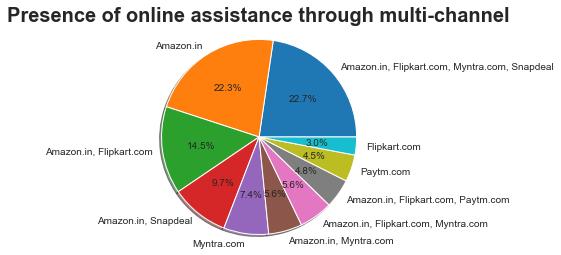

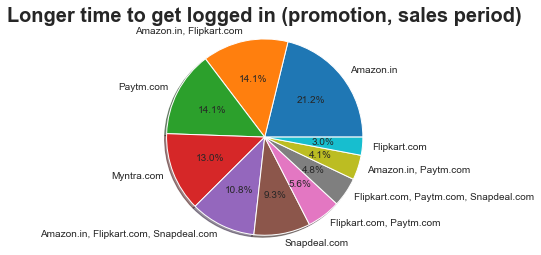

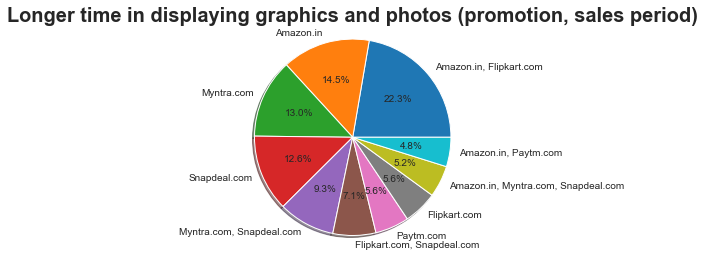

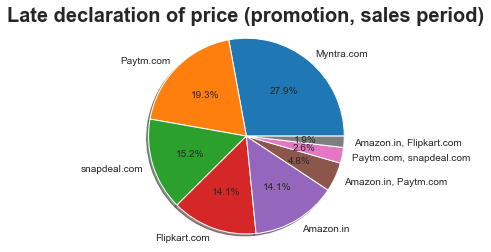

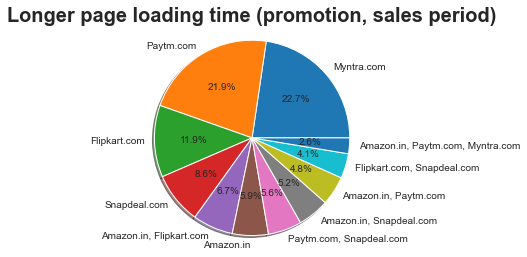

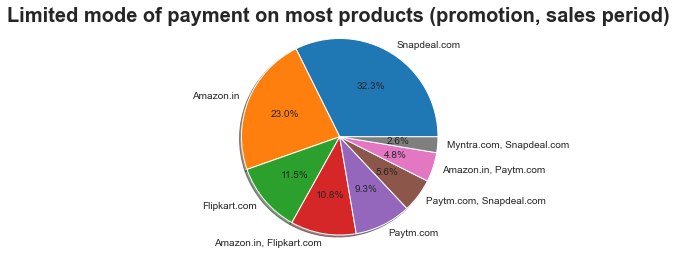

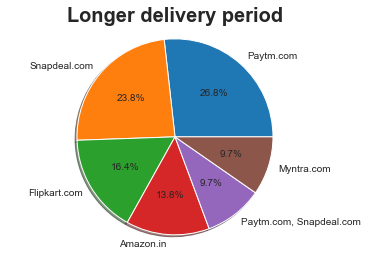

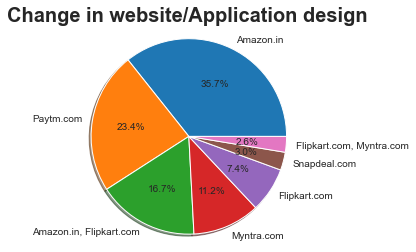

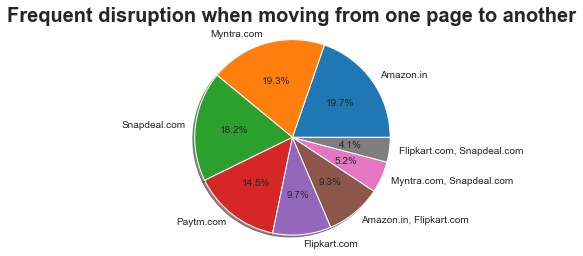

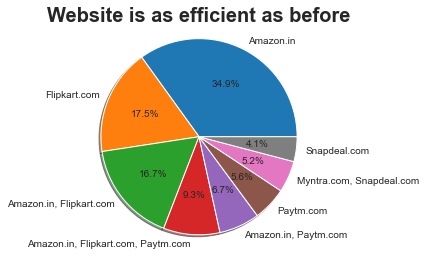

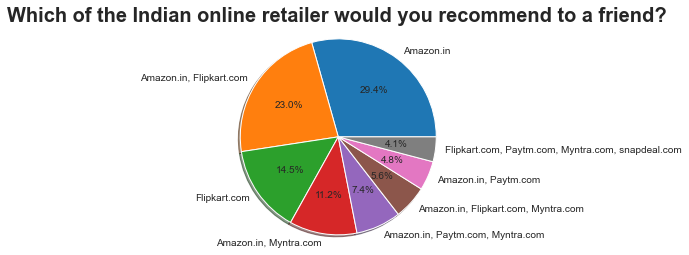

In [236]:
for i in list(range(len(data))):
    plt.figure()
    x=df[data[i]].value_counts()
    plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%',textprops={'fontsize':10})
    plt.title(data[i],fontdict={'fontweight':'bold','fontsize':20})
    plt.axis('equal')
    

# Obseravtion 1-i can say amazon has got high positive review as well as high negative review also but positive have high count as compare to other

2-same with flipkart and myntra

3-but paytm and snapdeal has got less positive review but high negative review

# 1-Amazon

#To improve things

1-Reduce longer time to login

2-Reduce Longer time in displaying graphics and photos

3-Late declaration of price

4-Reduce Longer page loading time

5-More payment options

6-Reduce Longer delivery period

#Positive Feedback Review

1-Easy to use website or application

2-Visual appealing web-page layout

3-Wild variety of product on offer

4-Complete, relevant description information of product

5-Fast loading website speed of website

6-Reliability of the website or application

7-Quickness to complete purchase

8-Availability of several payment options

9-Speedy order delivery

10-Privacy of customers’ information

11-Security of customer financial information

12-Perceived Trustworthiness

13-Presence of online assistance through multi-choice

14-Website is as efficient as before


# 2-FLIPKART

#Positive

1-Easy to use website or application

2-Visual appealing web-page layout

3-Wild variety of product on offer

4-Complete, relevant description information of product

5-Fast loading website speed of website

6-Reliability of the website or application

7-Quickness to complete purchase

8-Availability of several payment options

9-Speedy order delivery

10-Privacy of customers’ information

11-Security of customer financial information

12-Perceived Trustworthiness

13-Presence of online assistance through multi-choice

14-Website is as efficient as before

15-Which of the Indian online retailer would you choose

#Negative

1-Longer time to get logged in

2-Longer time in displaying graphics and photos

3-Late declaration of price

4-Longer page loading time

5-Limited mode of payment on most products

6-Longer delivery period

7-Change in website/Application design

8-Frequent disruption when moving from one page to another

# Paytm.com

#Positive Suggestion
1-Easy to use website or application

2-Visual appealing web-page layout 

3-Wild variety of product on offer

4-Complete, relevant description information of product 

5-Fast loading website speed of website 

6-Reliability of the website or application

7-Privacy of customers’ information

8-Security of customer financial information

9-Perceived Trustworthiness

10-Presence of online assistance through multi-choice

11-Website is as efficient as before

12-Which of the Indian online retailer would you choose

#Negative

#Negative review with count

1-Longer time to get logged in

2-Longer time in displaying graphics and photos

3-Late declaration of price

4-Longer page loading time

5-Limited mode of payment on most products

6-Longer delivery period

7-Change in website/Application design

8-Frequent disruption when moving from one page to another

# Myntra

Reviews 

Positive

1-Easy to use website or application 

2-Visual appealing web-page layout 

3-Wild variety of product on offer 

4-Complete, relevant description information of product 

5-Fast loading website speed of website 

6-Reliability of the website or application 

7-Quickness to complete purchase 

8-Availability of several payment options 

9-Speedy order delivery 

10-Privacy of customers’ information 

11-Security of customer financial information 

12-Perceived Trustworthiness 

13-Presence of online assistance through multi-choice 

14-Website is as efficient as before 

15-Which of the Indian online retailer would you choose 

#Negative

1-Longer time to get logged in 

2-Longer time in displaying graphics and photos 

3-Late declaration of price 

4-Longer page loading time 

5-Limited mode of payment on most products 

6-Longer delivery period 

7-Change in website/Application design 

8-Frequent disruption when moving from one page 

# Snapdeal

Reviews wirh counts

positive

1-Easy to use website or application

2-Visual appealing web-page layout 

3-Wild variety of product on offer 

4-Complete, relevant description information of product 

5-Fast loading website speed of website 

6-Reliability of the website or application 

7-Availability of several payment options 

8-Speedy order delivery 

9-Privacy of customers’ information 

10-Security of customer financial information 

11-Website is as efficient as before 

#Negative

1-Longer time to get logged in 

2-Longer time in displaying graphics and photos 

3-Late declaration of price 

4-Longer page loading time 

5-Limited mode of payment on most products 

6-Longer delivery period 

7-Change in website/Application design 

8-Frequent disruption when moving from one page 

In [244]:
data

Index(['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Ch

In [ ]:
#Drop the uncessary Features
df.drop('4 What is the Pin Code of where you shop online from?',axis=1,inplace=True)

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in df:
    df[i]=lb.fit_transform(df[i])

In [ ]:
y=df['Which of the Indian online retailer would you recommend to a friend?']

In [ ]:
 x=df.drop('Which of the Indian online retailer would you recommend to a friend?',axis=1)

# Data Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Features Selection Methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(x,y)

In [ ]:
feat_importances = pd.Series(m.feature_importances_, index=x.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Using Chi2 test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
selection=SelectKBest(score_func=chi2)
fit=selection.fit(x,y)

In [ ]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescore=pd.concat([dfscores,dfcolumns],axis=1)
featurescore.columns=['Score','Features']

In [ ]:
print(featurescore)

In [ ]:
featurescore

In [ ]:
for 'Score' in featurescore:
    if featurescore['Score']>50:
        print(featurescore[i])

In [ ]:
featurescore.sort_values()

In [ ]:
print(featurescore['Score'].values>50)